<a href="https://colab.research.google.com/github/sheilta/orbitgeny/blob/main/Latihan_statistical_test_%26_dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Contoh Kasus Uji Beda
Sebuah lembaga pelatihan bahasa inggris ingin mengetahui apakah pelatihan mereka berhasil meningkatkan skor TOEFL pesertanya. Mereka lalu menganalisa skor TOEFL sebelum dan sesudah pelatihan. Dengan tingkat kepercayaan 95%, apakah pelatihan ini berhasil?

![alt text](https://drive.google.com/uc?id=1QN1HbirK1jx5hwlFVEGJUHM64GNjuS1p)




In [ ]:
#Library
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
%matplotlib inline  

Membuat hipotesis

Ho : Nilai TOEFL sesudah pelatihan <= sebelum pelatihan

Ha : Nilai TOEFL sesudah pelatihan > sebelum pelatihan

In [ ]:
toefl = pd.read_csv('skor_toefl.csv')
toefl

Sebelum  Sesudah
0       429      569
1       443      599
2       408      612
3       459      536
4       401      572
..      ...      ...
94      496      552
95      413      544
96      400      531
97      471      561
98      443      588

[99 rows x 2 columns]

Menentukan uji statistik

![alt text](https://drive.google.com/uc?id=1asHY6TCNsltT7O8H6CmlEqQxQPgKH-6d)

Meski datanya ada 2, namun masih dari orang yang sama sehingga termasuk uji beda 2 kelompok berhubungan. Datanya numerik dan jumlahnya juga cukup banyak sehingga menurut teorema limit pusat yang dibahas minggu lalu, distribusi datanya mendekati normal. Menurut tabel diatas, uji statistik yang sesuai adalah "paired sample t-test". Di python uji ini tersedia di scipy.stats dengan nama "ttest_rel"

In [ ]:
#Melakukan uji t
uji_t = stats.ttest_rel(toefl['Sesudah'], toefl['Sebelum']) #hasilnya: (statistik hitungnya (t-hitung), pvalue)
print('nilai t-hitung = ', uji_t[0])
print('nilai p-value = ', uji_t[1])

nilai t-hitung =  30.255038012916643
nilai p-value =  1.638101871655264e-51


Berdasarkan hasil diatas, p-value = 1,6 x 10^(-51) < alpha (5%). Maka Ho ditolak, terdapat peningkatan yang signifikan dari TOEFL bahasa Inggris peserta pelatihan

# 2) Contoh dimensionality reduction (Latihan untuk student)
Pada latihan ini kita akan mengklasifikasi data genre musik. Disini kita akan membuat beberapa model KNN dengan menggunakan data asli dan data yang dimensinya sudah direduksi. Tugas kalian adalah membandingkan akurasi dan lama training antara data asli dan data yang sudah direduksi.

In [ ]:
music = pd.read_csv('music_genre.csv')
music2 = music.copy()
music2.dropna(inplace=True)
del music2['Artist Name']
del music2['Track Name']
music2

Popularity  danceability  ...  time_signature  Class
1            54.0         0.382  ...               4     10
2            35.0         0.434  ...               4      6
4            53.0         0.167  ...               4     10
5            53.0         0.235  ...               4      6
6            48.0         0.674  ...               4      2
...           ...           ...  ...             ...    ...
17991        35.0         0.166  ...               3      6
17992        27.0         0.638  ...               4      2
17993        34.0         0.558  ...               4      8
17994        29.0         0.215  ...               4      8
17995        43.0         0.400  ...               4     10

[11813 rows x 15 columns]

In [ ]:
#Memisahkan Feature dan Label
#Feature
X = music2.iloc[:,:14].values
Y = music2.iloc[:, 14].values

In [ ]:
scaler = StandardScaler()

# transform data
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 0.6578634  -0.86108     0.59301271 ... -0.22000411  0.33481231
   0.22582345]
 [-0.48893955 -0.54783734 -0.2323635  ...  0.8410691  -0.89146753
   0.22582345]
 [ 0.59750535 -2.15621793  1.25744056 ...  2.5868942   0.14687296
   0.22582345]
 ...
 [-0.5492976   0.19912594  1.28220184 ... -0.6092036   0.02828982
   0.22582345]
 [-0.85108785 -1.86707086  0.55587078 ...  0.28659404  0.05825067
   0.22582345]
 [-0.00607515 -0.75264985  0.75396107 ...  0.51558089 -0.26514691
   0.22582345]]


## Feature Selection dengan uji statistik
Disini kita akan memilih beberapa feature saja yang dianggap penting untuk nantinya digunakan untuk membuat model. Berbeda dengan PCA dan LDA, kita tidak mentransformasi data, hanya menggunakan sebagiannya saja. 

Karena labelnya kategorik, maka kita bisa menggunakan uji beda. Karena datanya banyak dan jumlah grupnya lebih dari 2, maka disini kita menggunakan ANOVA. Berikut contoh kodingan untuk feature selection dengan uji statistik yang tersedia di library 'sklearn.feature_selection'

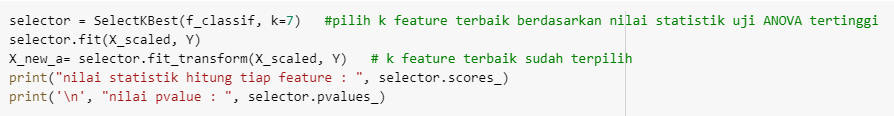

In [ ]:
#Ketik kodingannya disini, silahkan memilih berapa k feature yang mau digunakan


## PCA
Sebelum menentukan ingin mereduksi menjadi berapa komponen, kita bikin dulu visualisasi cumulative explained ratio sebagai gambaran berapa persen varians data asli yang tetap bisa dijelaskan meski sudah direduksi

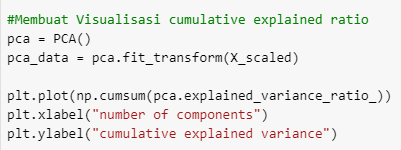

In [ ]:
#Ketik kodingan disini


Berapa nilai n_components agar cumulative explained variance minimal 75%? Sekarang tentukan berapa n_components yang menurutmu cukup bagus lalu transform datamu dengan kodingan seperti ini

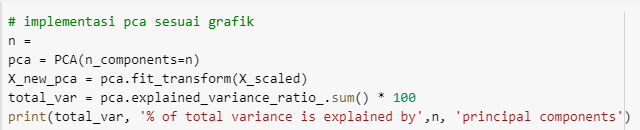

In [ ]:
# Ketik kodingannya disini


## LDA

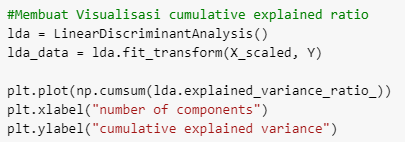

In [ ]:
#Ketik kodingannya disini


Berapa nilai n_components agar cumulative explained value minimal 75%? Sekarang tentukan berapa n_components yang menurutmu cukup bagus lalu transform datamu dengan kodingan seperti ini

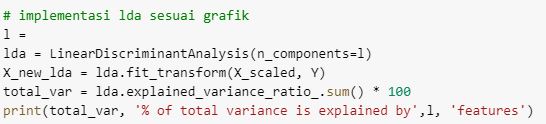

In [ ]:
#Ketik kodingannya disini


#Model KNN
Buat model knn dari data asli dan data yang sudah dilakukan dimensional reduction

Evaluasi berdasarkan akurasi dan juga lama training hingga membuat prediksi. Berikut ada contoh menghitung waktu dengan library 'time'

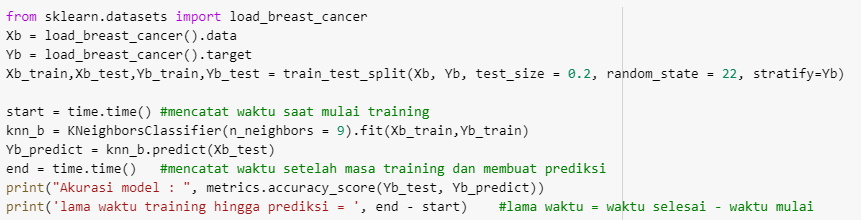

Kodingan diatas hanya contoh, tidak untuk diketik ulang. Nah silahkan memulai proses training data dengan knn

In [ ]:
#Training dan Testing data asli dan data dengan feature selection


In [ ]:
#Train Model and Predict menggunakan data asli


In [ ]:
#Train Model and Predict menggunakan data dengan feature selection


In [ ]:
#Train Model and Predict menggunakan data dengan PCA


In [ ]:
#Train Model and Predict menggunakan data dengan LDA


Apa yang dapat kamu simpulkan dari akurasi dan lama waktu training dari data sebelum dan sesudah dimensionality reduction?